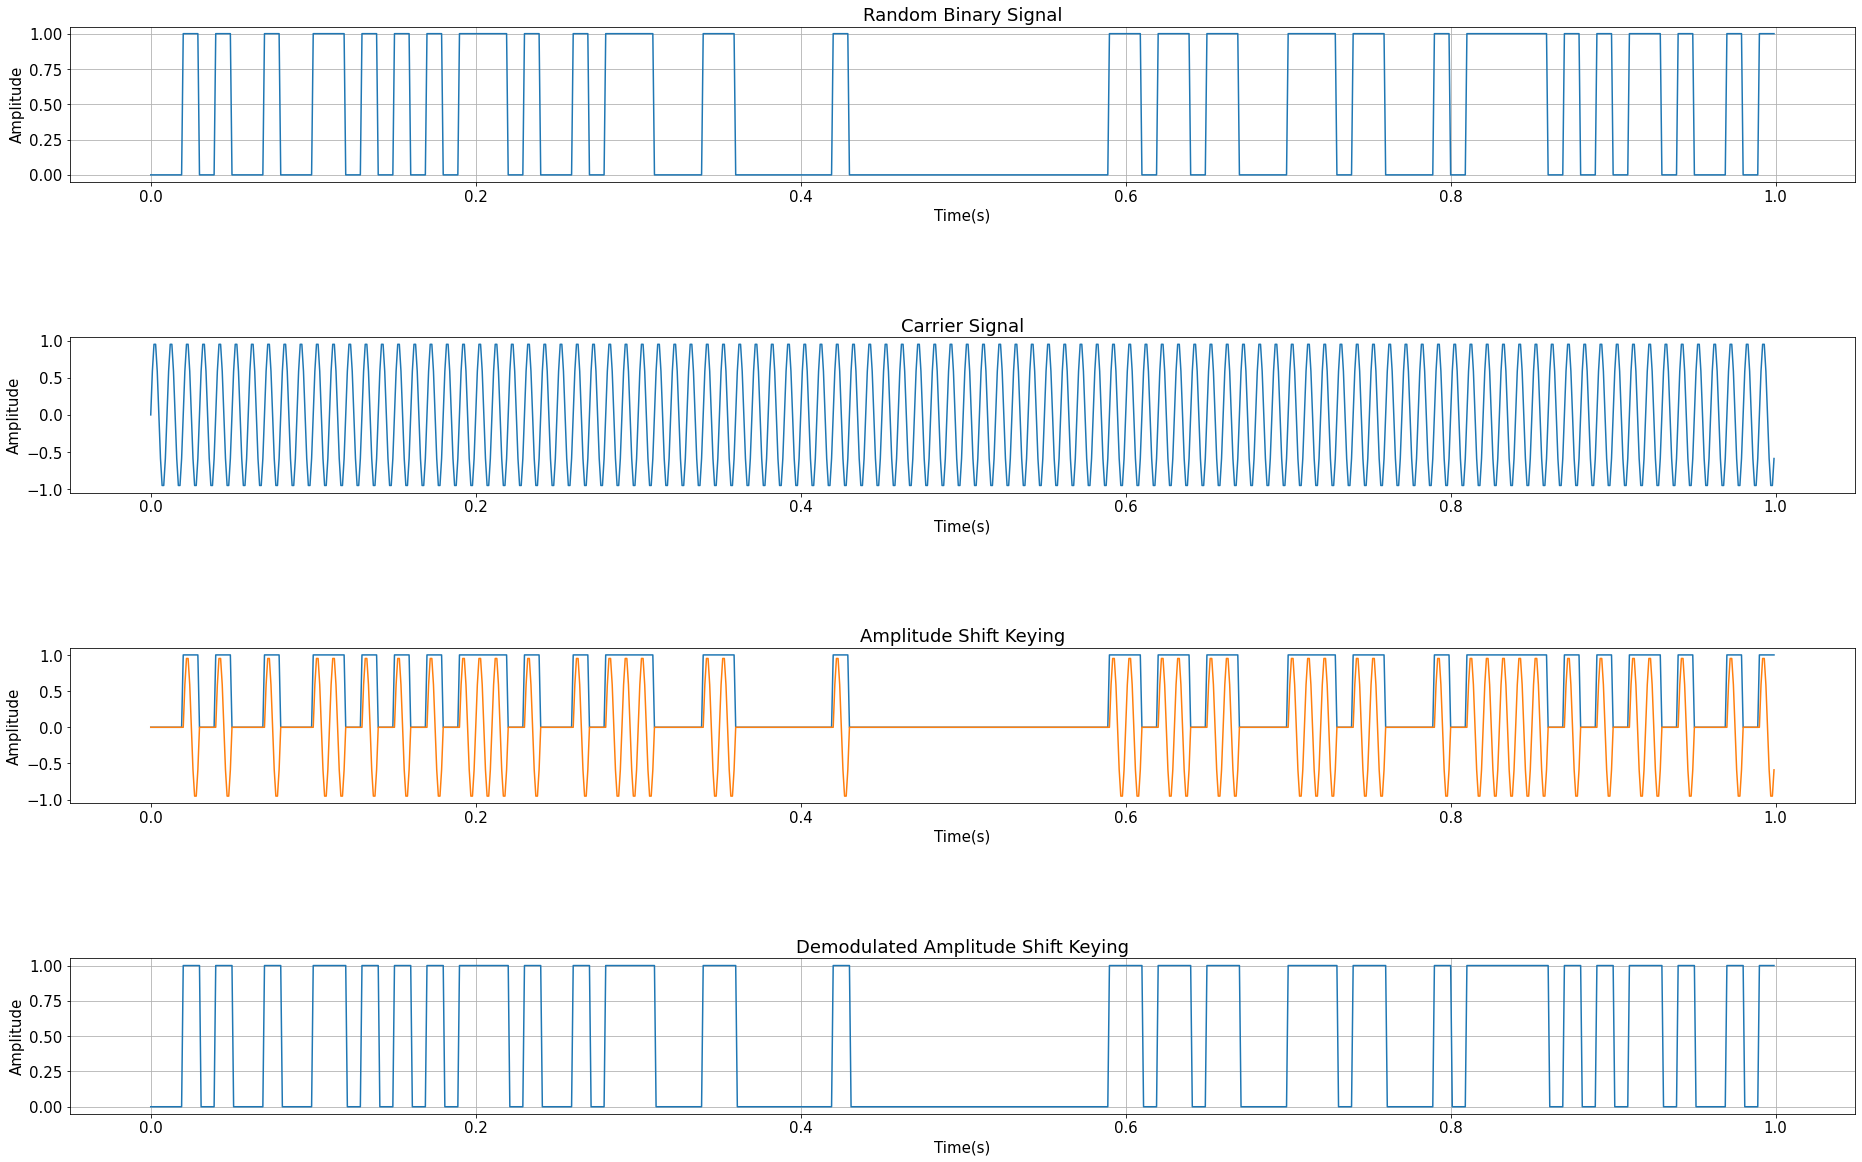

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.signal import butter, filtfilt

def random_binary_signal(sym, samples):
    sym_len = sym
    no_sym = samples
    rand_n = np.random.rand(no_sym)

    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n < 0.5)] = 0

    sig = np.zeros(sym_len*no_sym)

    id_n = np.where(rand_n == 1)

    for i in id_n[0]:
        temp = int(i*sym_len)
        sig[temp:temp+sym_len] = 1
    return sig

Fs = 1000  # sampling frequency
fc = 100  # carrier frequency
T = 1  # simulation time (sec)
t = np.arange(0, T, 1/Fs)

x = np.sin(2*pi*fc*t)

Td = 0.1  # Bit duration
samples = int(Td * Fs)  # samples in one bit
sym = int(np.floor(np.size(t)/samples))

sig = random_binary_signal(sym, samples)

ask = x * sig

# plot
plt.subplot(4, 1, 1)
plt.plot(t, sig)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Random Binary Signal')
plt.grid()

# Generate ASK
plt.subplot(4, 1, 2)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Carrier Signal')


plt.subplot(4, 1, 3)
plt.plot(t, sig)
plt.plot(t, ask)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Amplitude Shift Keying')

ask = np.abs(ask)
b, a = butter(5, 0.2)
s2 = filtfilt(b, a, ask)
ask2 = []
for i in s2:
    if i > 0.25:
        ask2.append(1)
    else:
        ask2.append(0)
        
ask2 = np.asanyarray(ask2)

plt.subplot(4, 1, 4)
plt.plot(t, ask2)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Demodulated Amplitude Shift Keying')


plt.grid()
plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(32, 20)


[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

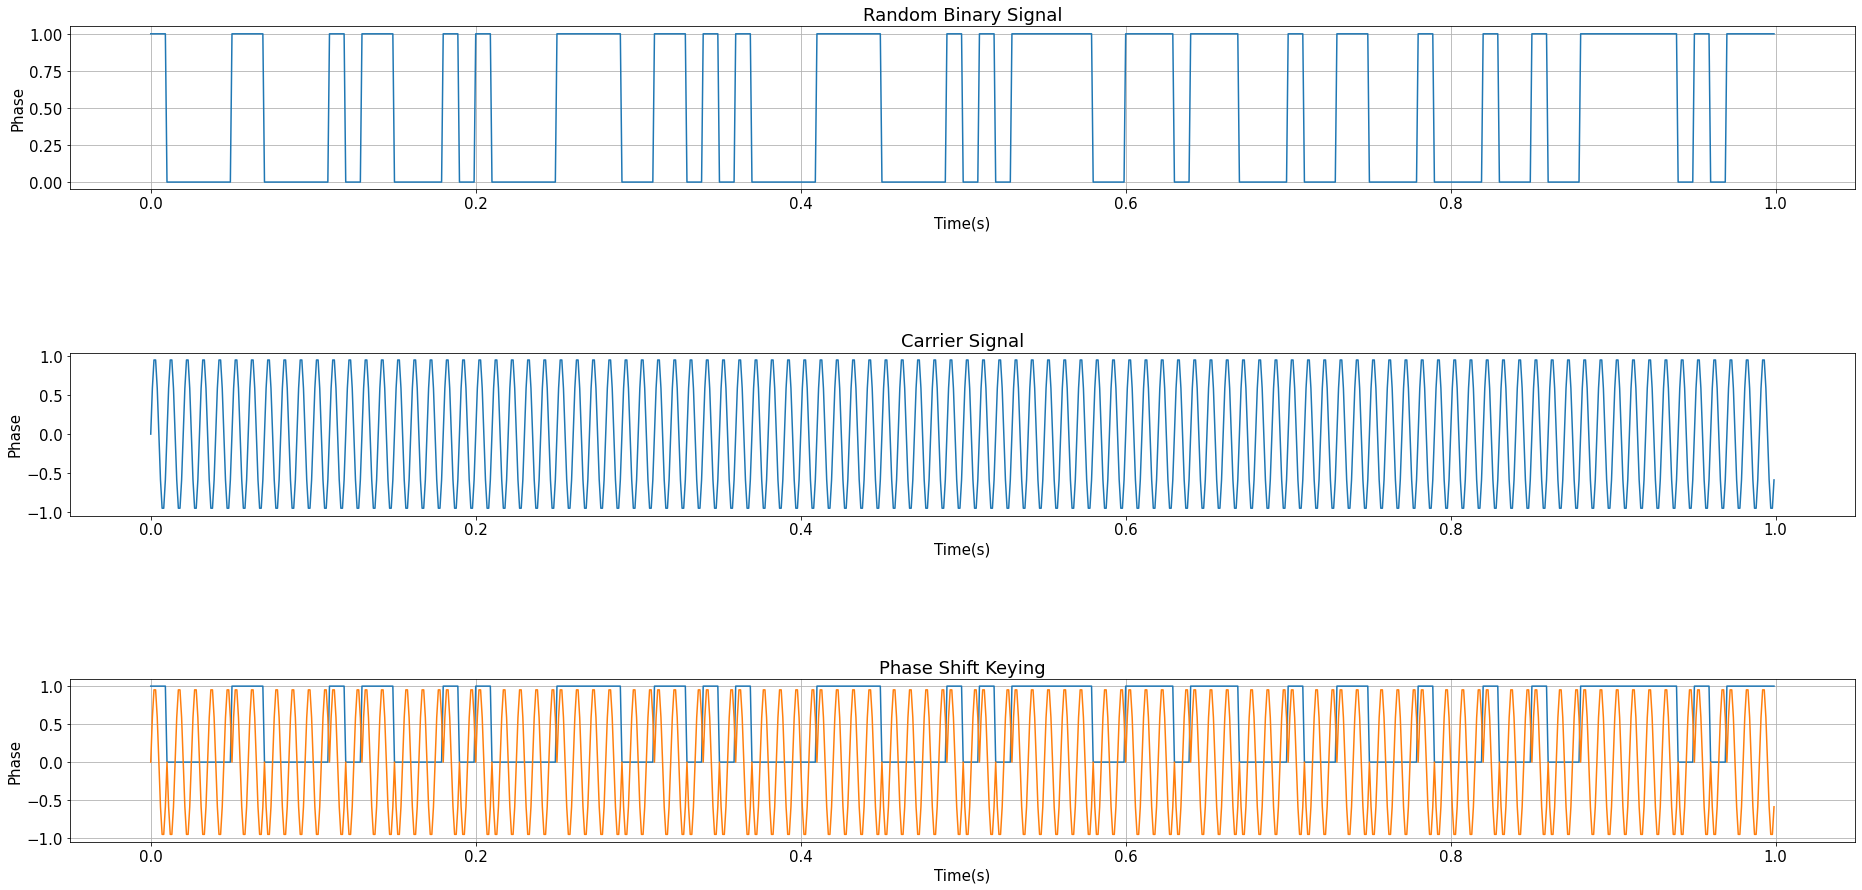

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.signal import butter, filtfilt

def random_binary_signal(sym, samples):
    sym_len = sym
    no_sym = samples
    rand_n = np.random.rand(no_sym)

    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n < 0.5)] = 0

    sig = np.zeros(sym_len*no_sym)

    id_n = np.where(rand_n == 1)

    for i in id_n[0]:
        temp = int(i*sym_len)
        sig[temp:temp+sym_len] = 1
    return sig

Fs = 1000  # sampling frequency
fc = 100  # carrier frequency
T = 1  # simulation time (sec)
t = np.arange(0, T, 1/Fs)
x = np.sin(2*pi*fc*t)

Td = 0.1  # Bit duration
samples = int(Td * Fs)  # samples in one bit
sym = int(np.floor(np.size(t)/samples))

sig = random_binary_signal(sym, samples)
psk = np.zeros(len(sig))
for i in range(len(sig)):
    if sig[i] > 0:
        psk[i] = x[i]*1
    else:
        psk[i] = x[i]*-1

# plot
plt.subplot(3, 1, 1)
plt.plot(t, sig)
plt.xlabel('Time(s)')
plt.ylabel('Phase')
plt.title('Random Binary Signal')
plt.grid()

# Generate ASK
plt.subplot(3, 1, 2)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Phase')
plt.title('Carrier Signal')


plt.subplot(3, 1, 3)
plt.plot(t, sig)
plt.plot(t, psk)
plt.xlabel('Time(s)')
plt.ylabel('Phase')
plt.title('Phase Shift Keying')

plt.grid()
plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
fig.set_size_inches(32, 15)


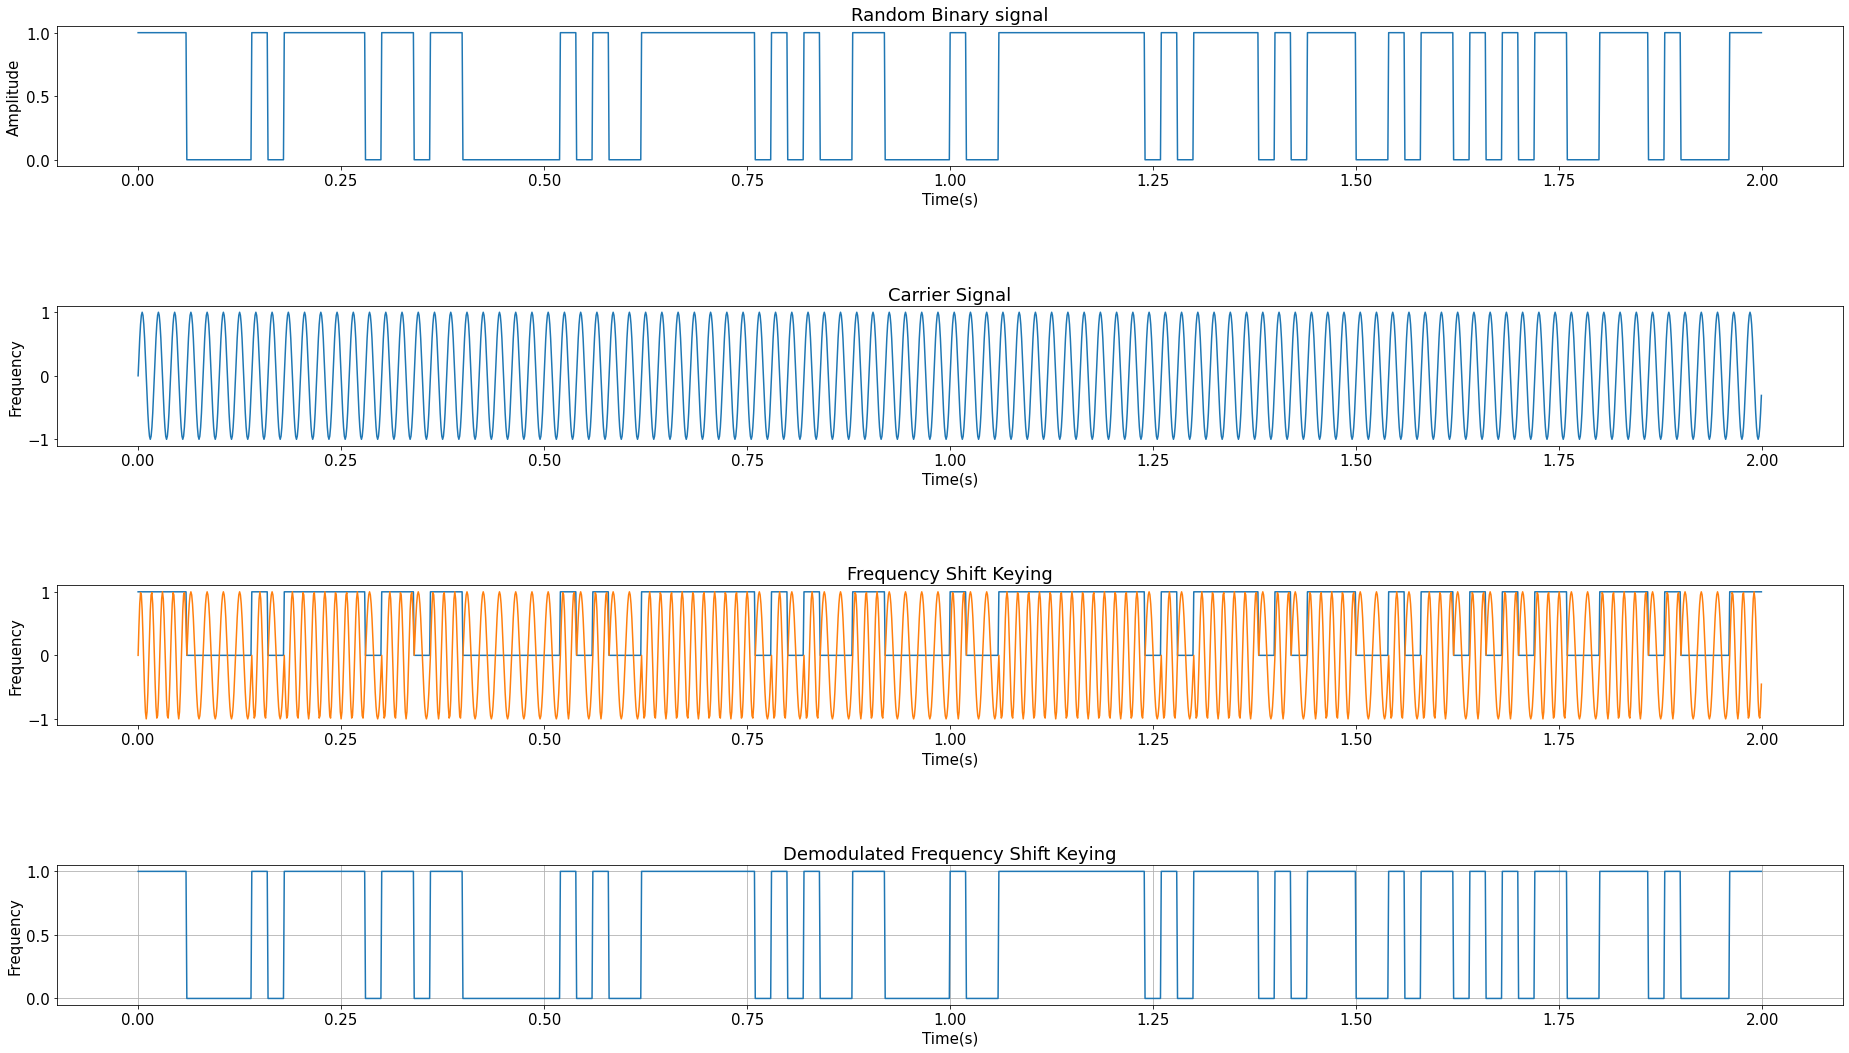

In [24]:
from scipy.signal import hilbert
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.signal import butter, filtfilt


def random_binary_signal(sym, samples):
    sym_len = sym
    no_sym = samples
    rand_n = np.random.rand(no_sym)

    rand_n[np.where(rand_n >= 0.5)] = 1
    rand_n[np.where(rand_n < 0.5)] = 0

    sig = np.zeros(sym_len*no_sym)

    id_n = np.where(rand_n == 1)

    for i in id_n[0]:
        temp = int(i*sym_len)
        sig[temp:temp+sym_len] = 1
    return sig


Fs = 1000
T = 2
fc = 50  # carrier frequency
t = np.arange(0, T, 1/Fs)
x = np.sin(2*pi*fc*t)

# generate binary signal waveform
sym_dur = 0.1
sym_len = int(sym_dur*Fs)
no_sym = int(np.floor(np.size(t)/sym_len))  # no. of symbols in binary signal

bin_sig = random_binary_signal(no_sym, sym_len)
f = fc + fc*bin_sig/2
fsk = np.sin(2*pi*f*t)

plt.subplot(4, 1, 1)
plt.plot(t, bin_sig)
plt.title('Random Binary signal')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')

# Generate ASK
plt.subplot(4, 1, 2)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Frequency')
plt.title('Carrier Signal')


plt.subplot(4, 1, 3)
plt.plot(t, bin_sig)
plt.plot(t, fsk)
plt.xlabel('Time(s)')
plt.ylabel('Frequency')
plt.title('Frequency Shift Keying')

b, a = butter(5, 0.1)
s2 = filtfilt(b, a, fsk)

b, a = butter(5, 0.1, 'high')
s3 = filtfilt(b, a, fsk)

s2 = np.abs(hilbert(s2))
s3 = np.abs(hilbert(s3))

fsk2 = []
for _ in range(len(s2)):
    i = s2[_]
    j = s3[_]
    
    if abs(i - j) > 0.66:
        fsk2.append(1)
    else:
        fsk2.append(0)

for i in range(0, len(t), 20):
    if np.mean(fsk2[i:i+20]) > 0.3:
        for k in range(20):
            fsk2[i+k] = 1
    else :
        for k in range(20):
            fsk2[i+k] = 0
            
fsk2 = np.asarray(fsk2)

plt.subplot(4, 1, 4)
plt.plot(t, fsk2)
plt.xlabel('Time(s)')
plt.ylabel('Frequency')
plt.title('Demodulated Frequency Shift Keying')

plt.grid()
plt.rc('font', size=15)
plt.subplots_adjust(hspace=1)
fig = plt.gcf()
fig.set_size_inches(32, 18)
